<a href="https://colab.research.google.com/github/cipherchawla/Twitter-sentinment_analysis/blob/main/project_hate_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load the dataset
df = pd.read_csv("/content/labeled_data.csv")

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# Explore the distribution of classes
class_distribution = df[['hate_speech', 'offensive_language', 'neither']].sum()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 hate_speech            6952
offensive_language    59819
neither               13612
dtype: int64


In [ ]:
# Shuffle the data
df = shuffle(df, random_state=42).reset_index(drop=True)

In [ ]:
# Preprocessing function
def preprocess_function(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W+', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'tweet' column
df['processed_tweet'] = df['tweet'].astype(str).apply(preprocess_function)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_tweet'], df['class'], test_size=0.2, random_state=42
)

In [ ]:
#Feature Taining
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Training a Naive Bayes model
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       279
           1       0.83      0.99      0.90      3816
           2       0.90      0.40      0.55       862

    accuracy                           0.83      4957
   macro avg       0.91      0.46      0.49      4957
weighted avg       0.85      0.83      0.79      4957

[[   1  265   13]
 [   0 3789   27]
 [   0  519  343]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame with 'processed_tweet' and 'class' columns
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_tweet'], df['class'], test_size=0.2, random_state=42
)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Check the lengths
print(len(y_test))  # Should be the same as len(y_pred)


4957


In [ ]:
# Assuming df is your DataFrame with 'processed_tweet' column
X_processed = tfidf_vectorizer.transform(df['processed_tweet'])

# Add the predicted labels to the DataFrame
df['predicted_label'] = model.predict(X_processed)

# Analyze misclassifications
misclassified = df[df['class'] != df['predicted_label']]
print("Misclassified instances:\n", misclassified[['tweet', 'class', 'predicted_label']])

Misclassified instances:
                                                    tweet  class  \
2      RT @eanahS__: @1inkkofrosess lol my credit ain...      2   
11     @Nien_Nunb what did you search? Gay redneck ep...      0   
16     @KeebitHalal @LogansWarning gotta love it when...      0   
19      @StunningStina their tortillas are trash though.      2   
22     RT @JeffDuncan_: JSU coach Omar Johnson: "It's...      2   
...                                                  ...    ...   
24743  RT @UFGatorFamily: Incase any hillbillies try ...      2   
24753  my grandma got a rosta colored dress\nit's so ...      2   
24755  Dawg!! RT @Chill__Cosby: Man this about to be ...      2   
24756       @khamillkilroy &#128514;&#128514; Shy Glizzy      2   
24776  I'm going to sell my iPhone and both my Macs, ...      0   

       predicted_label  
2                    1  
11                   1  
16                   1  
19                   1  
22                   1  
...                

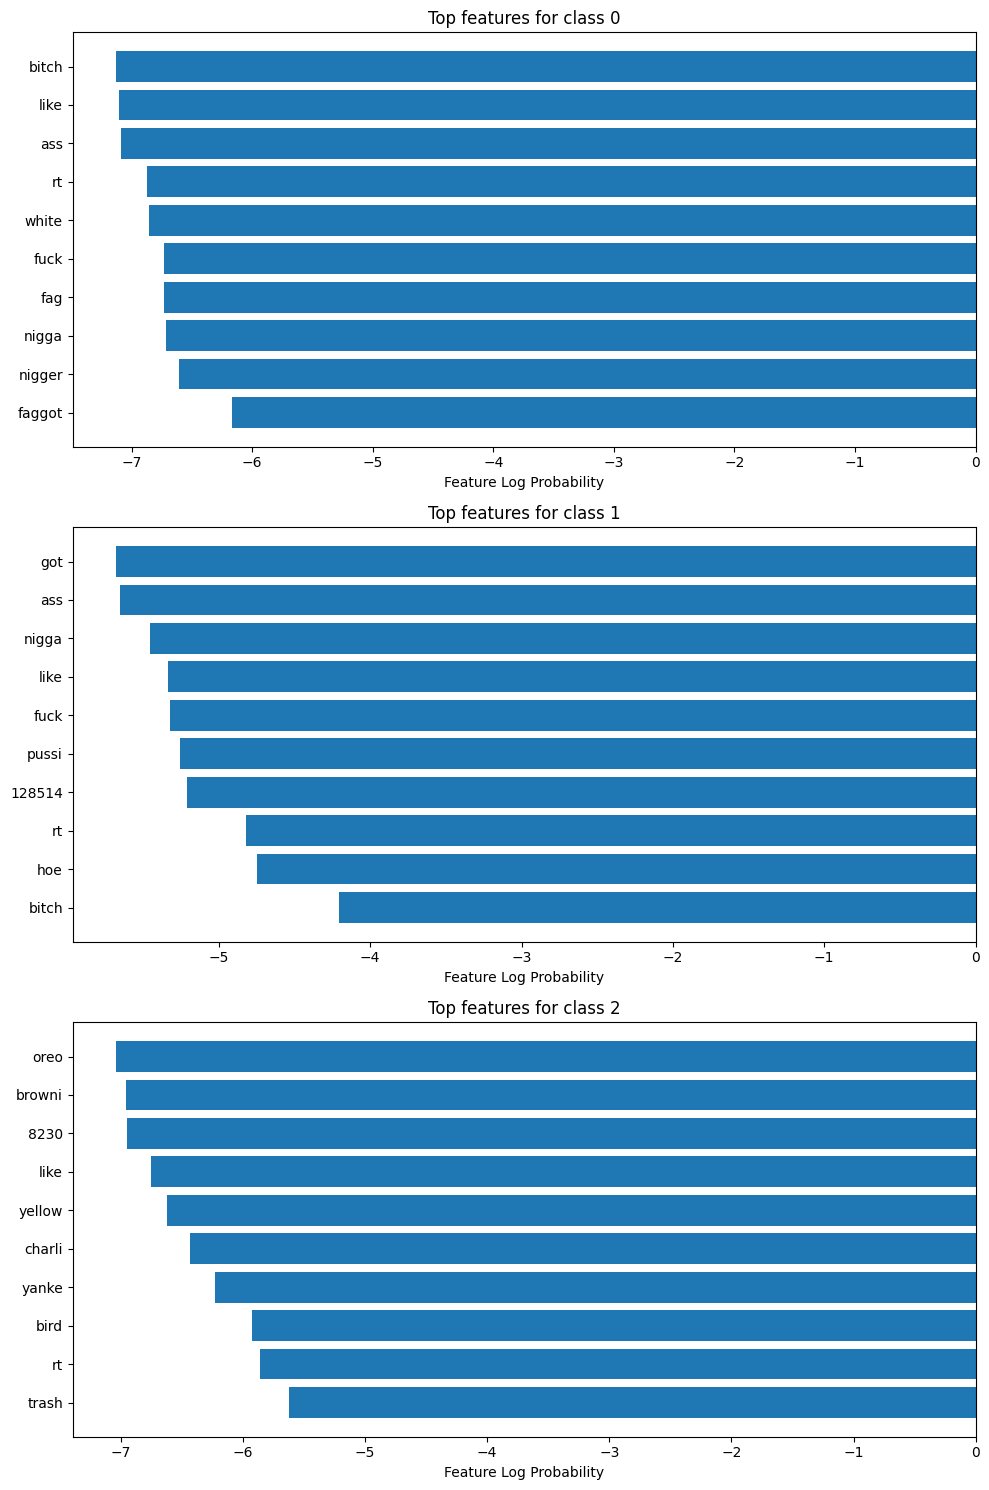

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Naive Bayes model
feature_names = tfidf_vectorizer.get_feature_names_out()
class_labels = model.classes_

# Extracting the feature log probabilities
feature_log_probs = model.feature_log_prob_

# Create subplots
fig, axes = plt.subplots(nrows=len(class_labels), ncols=1, figsize=(10, 5 * len(class_labels)))

# Visualizing top features for each class
for i, label in enumerate(class_labels):
    top_feature_indices = feature_log_probs[i].argsort()[-10:][::-1]
    top_features = [feature_names[idx] for idx in top_feature_indices]

    # Bar chart
    axes[i].barh(top_features, feature_log_probs[i][top_feature_indices])
    axes[i].set_title(f'Top features for class {label}')
    axes[i].set_xlabel('Feature Log Probability')

# Adjust layout
plt.tight_layout()
plt.show()


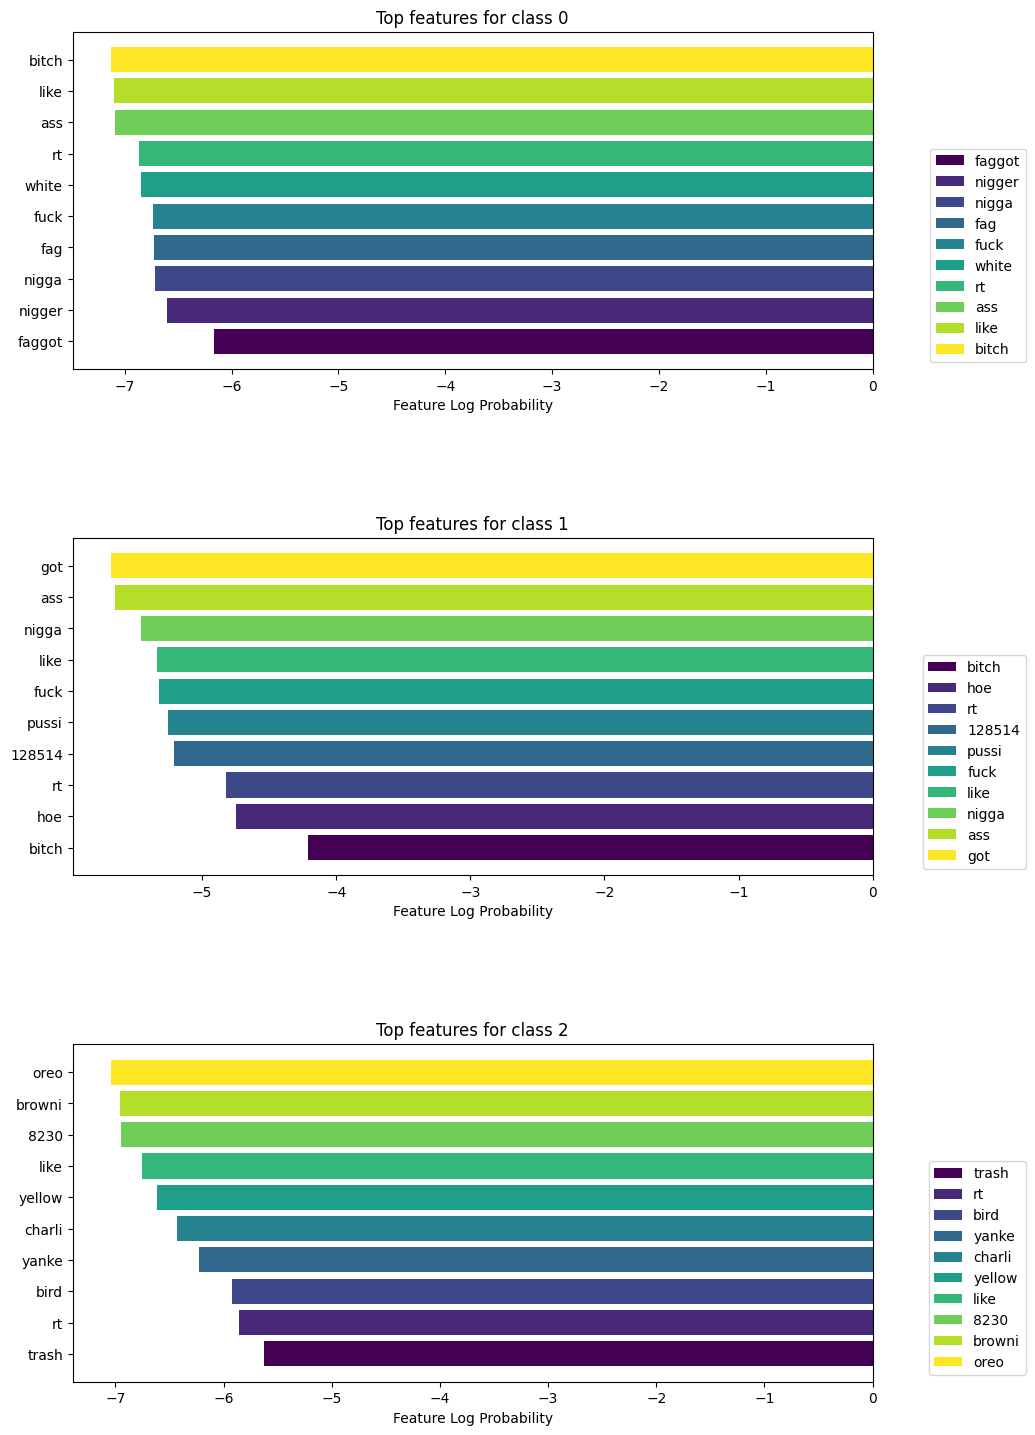

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained Naive Bayes model
feature_names = tfidf_vectorizer.get_feature_names_out()
class_labels = model.classes_

# Extracting the feature log probabilities
feature_log_probs = model.feature_log_prob_

# Create subplots
fig, axes = plt.subplots(nrows=len(class_labels), ncols=1, figsize=(10, 5 * len(class_labels)))

# Define a color palette
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Visualizing top features for each class
for i, label in enumerate(class_labels):
    top_feature_indices = feature_log_probs[i].argsort()[-10:][::-1]
    top_features = [feature_names[idx] for idx in top_feature_indices]

    # Bar chart with color customization
    bars = axes[i].barh(top_features, feature_log_probs[i][top_feature_indices], color=colors)
    axes[i].set_title(f'Top features for class {label}')
    axes[i].set_xlabel('Feature Log Probability')

    # Add a color legend
    axes[i].legend(bars, top_features, loc='lower right', bbox_to_anchor=(1.2, 0))

# Manually adjust layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.5)

# Show the plot
plt.show()


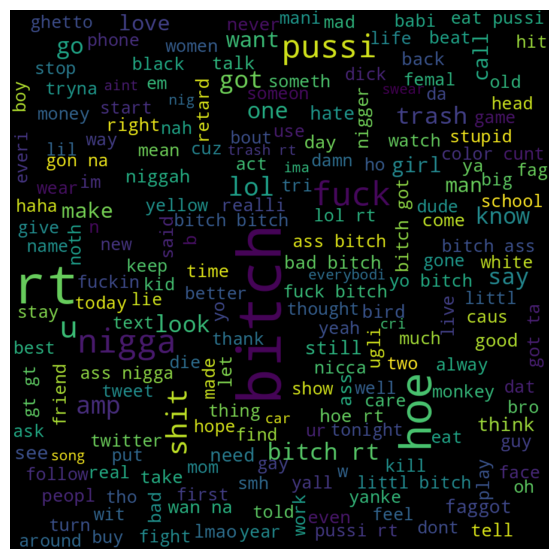

In [ ]:
from wordcloud import WordCloud

# Assuming 'df' is your DataFrame and 'processed_tweet' is the column with text data
text_data = df['processed_tweet'].astype(str).values
text = " ".join(text_data)

wordcloud = WordCloud(width=900, height=900, random_state=56, max_font_size=100).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Get feature names from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Extract feature log probabilities from the trained multi-class Naive Bayes model
feature_log_probs = naive_bayes_classifier.feature_log_prob_

# Ensure the lengths match
min_len = min(len(feature_names), len(feature_log_probs[0]))

# Create DataFrames to associate feature names with log probabilities for each class
feature_importance_df_list = []
class_names = ['hate_speech', 'offensive_language', 'neither']

for i, class_name in enumerate(class_names):
    log_probs_class = feature_log_probs[i][:min_len]
    feature_importance_class_df = pd.DataFrame({'Feature': feature_names[:min_len], 'Log Probability': log_probs_class})
    top_influential_words_class = feature_importance_class_df.sort_values(by='Log Probability', ascending=False).head(10)
    feature_importance_df_list.append((class_name, top_influential_words_class))

# Print top influential words for each class
for class_name, top_influential_words_class in feature_importance_df_list:
    print(f"Top Influential Words for {class_name}:\n", top_influential_words_class)

Top Influential Words for hate_speech:
               Feature  Log Probability
1665             agre        -4.620050
3117           bender        -5.103186
1664           agoooo        -5.130609
1848              all        -5.284998
3114  benbornreadysmu        -5.321391
3754       boxingscen        -5.333705
4835            chick        -5.423284
4504    cass_uhhh_dee        -5.675925
544    1josh_warwick3        -5.684910
2701         badassja        -5.690593
Top Influential Words for offensive_language:
               Feature  Log Probability
734              3abd        -3.539585
2179            anyth        -4.116436
3754       boxingscen        -4.123530
3543            blowm        -4.579837
136            127773        -4.654016
1848              all        -4.730725
2701         badassja        -4.759278
3114  benbornreadysmu        -4.891839
544    1josh_warwick3        -5.079074
1901         almighti        -5.104704
Top Influential Words for neither:
              Featur